In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# Imports

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# Dummify label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
# As array for the neural network model

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # 4D Tensor : Nb of observations, Pixel widht, Pixel height, Black and white intensity
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1) 

In [0]:
input_shape = (28, 28, 1)

In [0]:
# Normalisation
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = input_shape))
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))

model.add(Flatten()) # Output a vector
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


In [17]:
sgd = SGD(lr=0.1)

model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
model.fit(x_train, y_train, verbose=1, batch_size=300, epochs=10) # Parallelization

Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.4774 - acc: 0.8623
Epoch 2/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1500 - acc: 0.9546
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0979 - acc: 0.9711
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0699 - acc: 0.9792
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0541 - acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0437 - acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0345 - acc: 0.9891
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0286 - acc: 0.9915
Epoch 9/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0230 - acc: 0.9928
Epoch 10/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0192 - a

In [18]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 130us/step


[0.052078303378546846, 0.9828]

In [19]:
model.predict(x_test[1].reshape(1,28, 28, 1))

array([[3.7743693e-08, 9.4864745e-06, 9.9999034e-01, 1.9862225e-09,
        1.3932049e-13, 2.2010995e-12, 2.0733015e-09, 1.5110393e-15,
        9.1028646e-08, 5.9778471e-16]], dtype=float32)

In [20]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

TypeError: ignored

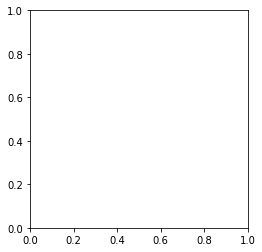

In [14]:
plt.imshow(x_test[1])